In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('Zomato_Data.xls', index_col=0)
df.head()

,online_order,book_table,rating,votes,approx_cost,rest_type,cuisine_cat,city_location
restaurant_id,,,,,,,,
1001,Yes,Yes,4.1,775,800,Buffet,North Indian,JP Nagar
1002,Yes,No,4.1,787,800,Buffet,North Indian,BHEL
1003,Yes,No,3.8,918,800,Buffet,Mixed,Banashankari
1004,No,No,3.7,88,300,Buffet,North Indian,BHEL
1005,No,No,3.8,166,600,Buffet,South Indian,BHEL


In [171]:
df.shape
#600 rows and 8 columns(Excluding key column)

(600, 8)

In [172]:
df.describe()

,rating,votes,approx_cost
count,600.000000,600.000000,600.000000
mean,3.648667,200.008333,418.450000
std,0.381892,491.976608,239.457715
min,2.500000,4.000000,100.000000
25%,3.400000,21.000000,250.000000
50%,3.700000,64.000000,350.000000
75%,3.900000,177.000000,550.000000
max,4.800000,4884.000000,1500.000000


In [173]:
#Checks for blanks
zero_counts={ 'online_order': df['online_order'].isnull().sum() , 'book_table': df['book_table'].isnull().sum() ,'rating': df['rating'].isnull().sum() ,
            'rating': df['rating'].isnull().sum() , 'votes': df['votes'].isnull().sum() ,'approx_cost': df['approx_cost'].isnull().sum() ,
            'rest_type': df['rest_type'].isnull().sum(), 'cuisine_cat': df['cuisine_cat'].isnull().sum() , 'city_location': df['city_location'].isnull().sum()}
zero_counts

{'online_order': 0,
 'book_table': 0,
 'rating': 0,
 'votes': 0,
 'approx_cost': 0,
 'rest_type': 0,
 'cuisine_cat': 0,
 'city_location': 0}

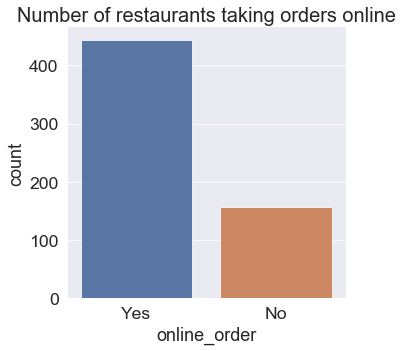

In [174]:
# plot of number of restaurtants taking orders online
sns.set_context("paper", font_scale = 2, rc = {"font.size": 18,"axes.titlesize": 20,"axes.labelsize": 18  })   
sns.catplot(data = df, kind = 'count', x = 'online_order', legend=True)
plt.title('Number of restaurants taking orders online')
plt.show()

In [175]:
df['online_order'].value_counts()

Yes    443
No     157
Name: online_order, dtype: int64

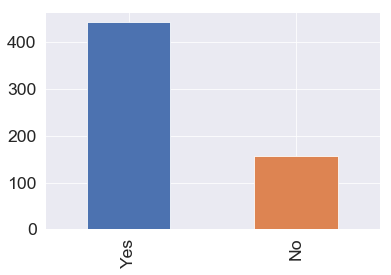

In [176]:
df['online_order'].value_counts().plot(kind='bar')

In [177]:
df['book_table'].value_counts()

No     591
Yes      9
Name: book_table, dtype: int64

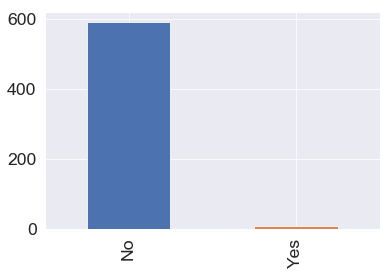

In [178]:
df['book_table'].value_counts().plot(kind='bar')

In [179]:
df['rating'].value_counts().sort_index()

2.5     3
2.6     3
2.7     6
2.8     6
2.9     9
3.0    15
3.1    22
3.2    25
3.3    42
3.4    37
3.5    38
3.6    63
3.7    68
3.8    92
3.9    65
4.0    23
4.1    38
4.2    19
4.3    10
4.4     7
4.5     4
4.6     3
4.7     1
4.8     1
Name: rating, dtype: int64

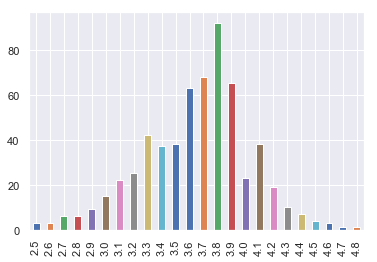

In [207]:
df['rating'].value_counts().sort_index().plot(kind='bar')
# Plot can be approximated as normal distribution

In [181]:
df['approx_cost'].value_counts().sort_index()

100     22
120      1
150     47
200     65
250     49
300     98
350     21
400     65
450     24
500     50
550     11
600     38
650     13
700     25
750     15
800     30
850      3
900      6
950      2
1000     5
1100     1
1200     4
1300     1
1400     2
1500     2
Name: approx_cost, dtype: int64

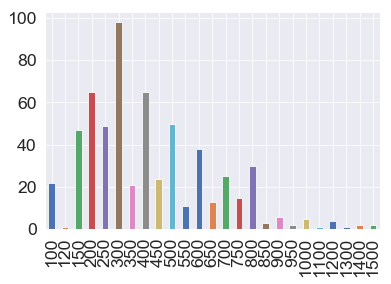

In [182]:
df['approx_cost'].value_counts().sort_index().plot(kind='bar')

In [183]:
df['rest_type'].value_counts().sort_index()

Buffet       82
Cafes        63
Delivery    242
Dine-out    213
Name: rest_type, dtype: int64

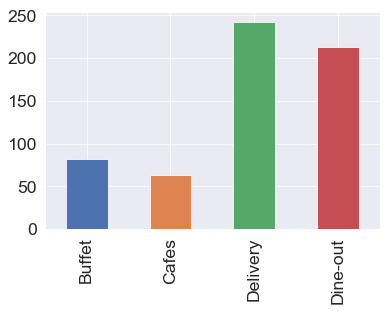

In [184]:
df['rest_type'].value_counts().sort_index().plot(kind='bar')

In [185]:
df['cuisine_cat'].value_counts().sort_index()

International     98
Mixed            133
North Indian     143
Regional         128
South Indian      98
Name: cuisine_cat, dtype: int64

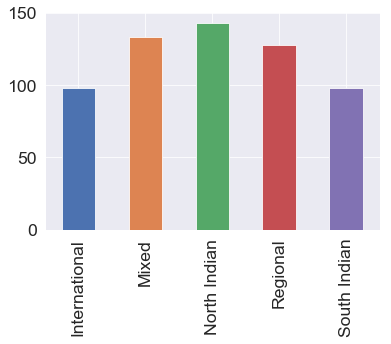

In [186]:
df['cuisine_cat'].value_counts().sort_index().plot(kind='bar')

In [187]:
df['city_location'].value_counts().sort_index()

BHEL            112
Banashankari    124
JP Nagar        118
Jayanagar       126
Mysore Road     120
Name: city_location, dtype: int64

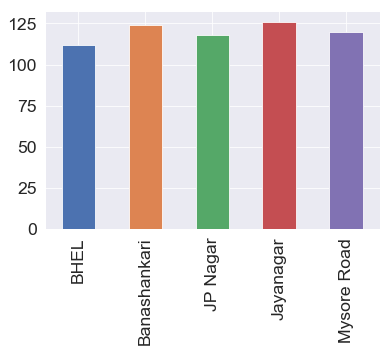

In [188]:
df['city_location'].value_counts().sort_index().plot(kind='bar')

In [189]:
# Creating deep copy of original dataframe
dff=df.copy(deep=True)

In [190]:
#Pre-Process Data
# Online order and book table are categorical variables
dff['online_order']= pd.get_dummies(dff.online_order, drop_first=True)
dff['book_table']= pd.get_dummies(dff.book_table, drop_first=True)

In [191]:
dff.head()

,online_order,book_table,rating,votes,approx_cost,rest_type,cuisine_cat,city_location
restaurant_id,,,,,,,,
1001,1,1,4.1,775,800,Buffet,North Indian,JP Nagar
1002,1,0,4.1,787,800,Buffet,North Indian,BHEL
1003,1,0,3.8,918,800,Buffet,Mixed,Banashankari
1004,0,0,3.7,88,300,Buffet,North Indian,BHEL
1005,0,0,3.8,166,600,Buffet,South Indian,BHEL


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


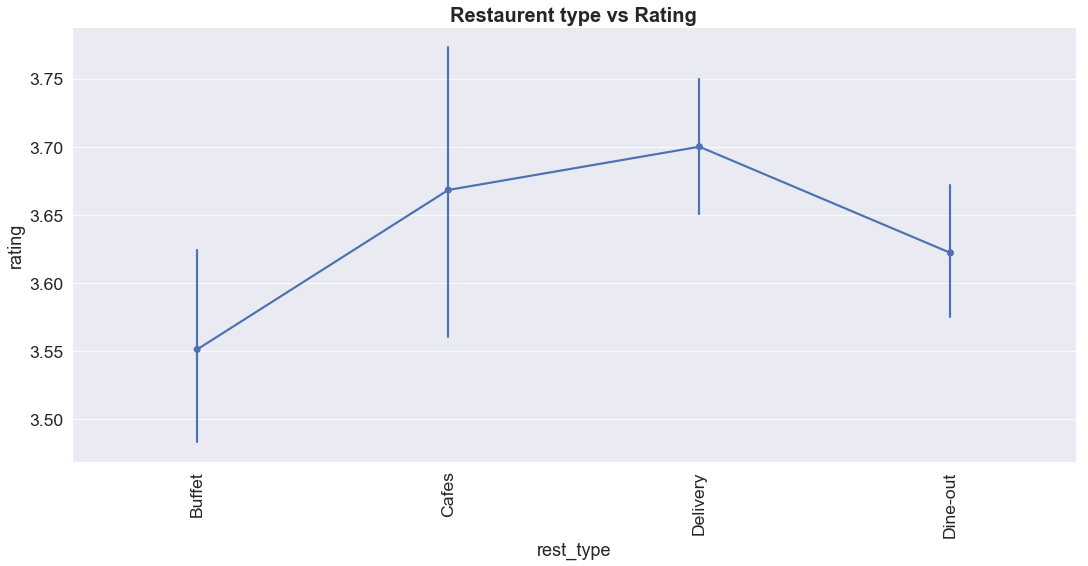

In [192]:
f,ax=plt.subplots(figsize=(18,8))
g = sns.pointplot(x=dff["rest_type"], y=dff["rating"], data=dff)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Restaurent type vs Rating', weight = 'bold')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


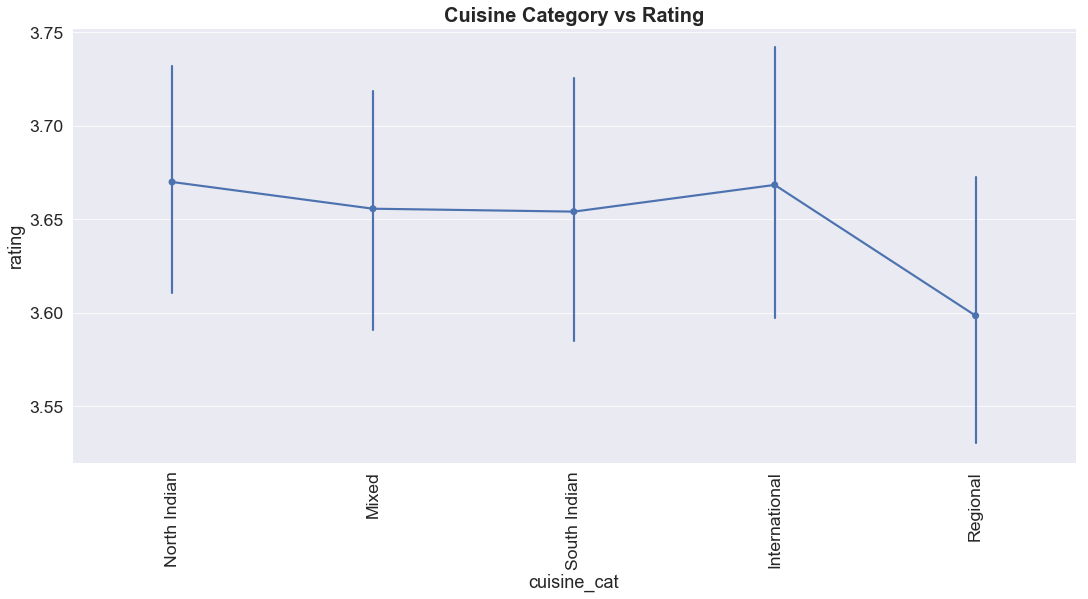

In [193]:
f,ax=plt.subplots(figsize=(18,8))
g = sns.pointplot(x=dff["cuisine_cat"], y=dff["rating"], data=dff)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Cuisine Category vs Rating', weight = 'bold')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


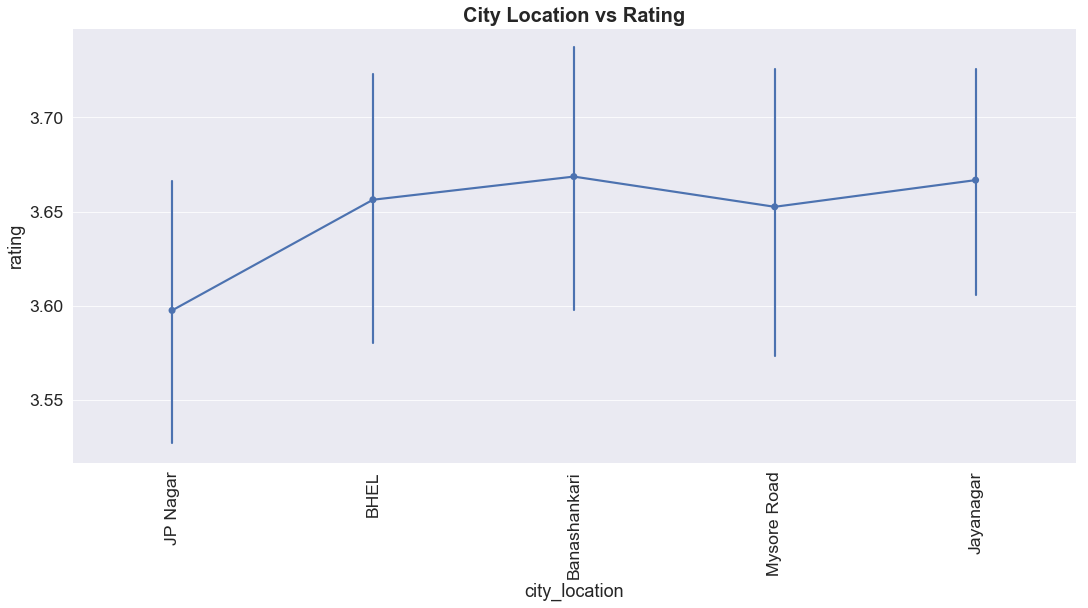

In [194]:
f,ax=plt.subplots(figsize=(18,8))
g = sns.pointplot(x=dff["city_location"], y=dff["rating"], data=dff)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('City Location vs Rating', weight = 'bold')
plt.show()

Text(0.5,1,'rating vs online order')

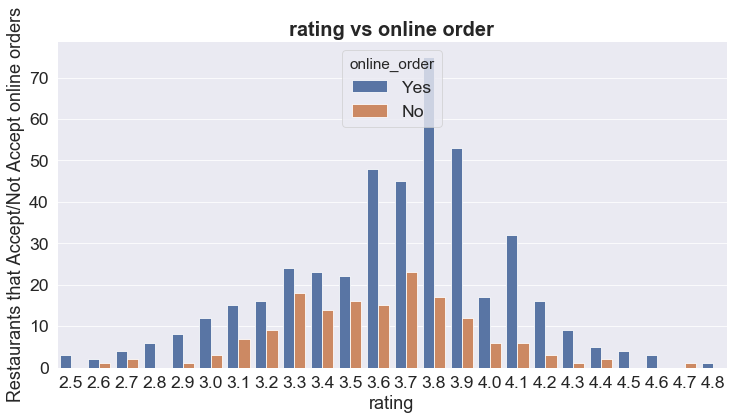

In [195]:
plt.figure(figsize = (12,6))
sns.countplot(x=df['rating'], hue = df['online_order'])
plt.ylabel("Restaurants that Accept/Not Accept online orders")
plt.title("rating vs online order",weight = 'bold')

In [196]:
# Standardizing values
from sklearn.preprocessing import StandardScaler
num_values1=dff.select_dtypes(['float64','int64']).columns
scaler = StandardScaler()
scaler.fit(dff[num_values1])
dff[num_values1]=scaler.transform(dff[num_values1])

from sklearn.preprocessing import LabelEncoder
T = LabelEncoder()                 
dff['city_location'] = T.fit_transform(dff['city_location'])
dff['rest_type'] = T.fit_transform(dff['rest_type'])
dff['cuisine_cat'] = T.fit_transform(dff['cuisine_cat'])

In [197]:
dff.head()

,online_order,book_table,rating,votes,approx_cost,rest_type,cuisine_cat,city_location
restaurant_id,,,,,,,,
1001,1,1,1.182822,1.169713,1.594721,0,2,2
1002,1,0,1.182822,1.194125,1.594721,0,2,0
1003,1,0,0.396604,1.460620,1.594721,0,1,1
1004,0,0,0.134531,-0.227860,-0.495072,0,2,0
1005,0,0,0.396604,-0.069184,0.758804,0,4,0


In [198]:
x = dff.drop(['rating'],axis = 1)
y = dff['rating']

In [199]:
x.head()

,online_order,book_table,votes,approx_cost,rest_type,cuisine_cat,city_location
restaurant_id,,,,,,,
1001,1,1,1.169713,1.594721,0,2,2
1002,1,0,1.194125,1.594721,0,2,0
1003,1,0,1.460620,1.594721,0,1,1
1004,0,0,-0.227860,-0.495072,0,2,0
1005,0,0,-0.069184,0.758804,0,4,0


In [200]:
y.head()

restaurant_id
1001    1.182822
1002    1.182822
1003    0.396604
1004    0.134531
1005    0.396604
Name: rating, dtype: float64

In [201]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 33)

In [202]:
# Applying linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [203]:
#R^2 score
lr.score(X_test, y_test)

0.138665915571635

In [204]:
# Applying random forest
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

In [205]:
#R^2 score
rfr.score(X_test,y_test)

0.14742827554464555

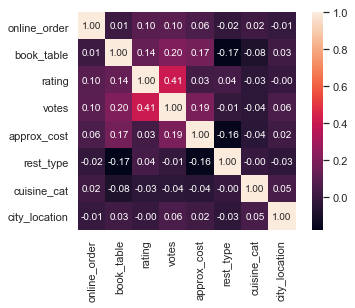

In [206]:
# Correlation Matrix
#dff.head()

cor_matrix = np.corrcoef(dff[dff.columns].values.T) # We transpose to get the data by columns. Columns become rows.
sns.set(font_scale=1)
cor_heat_map = sns.heatmap(cor_matrix,
 cbar=True,
 annot=True,
 square=True,
 fmt='.2f',
 annot_kws={'size':10},
 yticklabels=dff.columns,
 xticklabels=dff.columns)

plt.show()

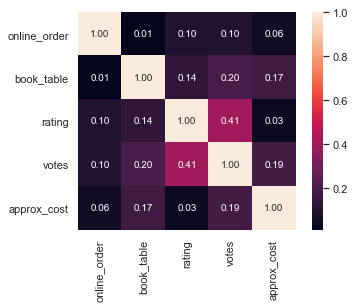

In [208]:
column_list= ['online_order', 'book_table', 'rating', 'votes','approx_cost']
cor_matrix = np.corrcoef(dff[column_list].values.T) # We transpose to get the data by columns. Columns become rows.
sns.set(font_scale=1)
cor_heat_map = sns.heatmap(cor_matrix,
 cbar=True,
 annot=True,
 square=True,
 fmt='.2f',
 annot_kws={'size':10},
 yticklabels=column_list,
 xticklabels=column_list)
plt.show()
